In [1]:
import numpy as np
import pandas as pd

In [2]:
air = pd.read_csv("C:\\Users\\Prajwal\\Desktop\\Data Science\\Assignments\\Clustering\\EastWestAirlines.csv")

In [3]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
air.drop(['ID#'],axis=1,inplace=True)

In [5]:
air.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
from sklearn import preprocessing

#### Normalizing Data

In [7]:
air_std = preprocessing.scale(air)
print(air_std)
air_std = pd.DataFrame(air_std)

[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.39545434e+00 -7.66919299e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.37995704e+00 -7.66919299e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.41192021e+00 -7.66919299e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.62167870e-01
  -1.31560393e+00  1.30391816e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -9.85033311e-02
  -1.31608822e+00 -7.66919299e-01]
 [-7.00507951e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
  -1.31754109e+00 -7.66919299e-01]]


## K-Means Clustering

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'WCSS')

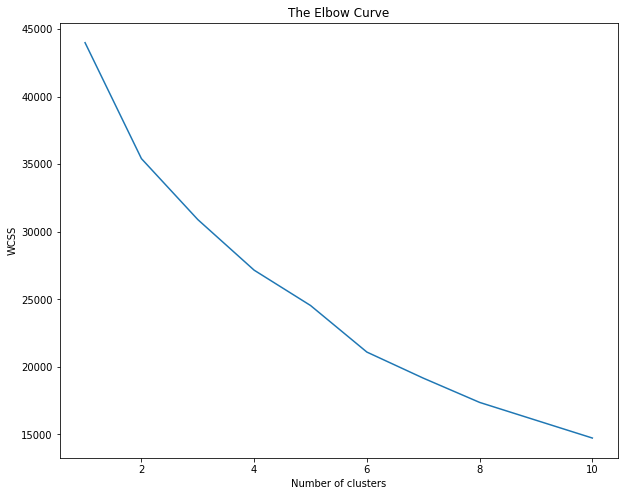

In [9]:
plt.figure(figsize=(10,8))
wcss = []


for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
    kmeans.fit(air_std)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

#### Fitting K-Means to dataset

In [11]:
kmeans = KMeans(n_clusters = 4,init = 'k-means++',random_state = 42)
y_kmeans = kmeans.fit_predict(air_std)

In [12]:
y_kmeans

array([0, 0, 0, ..., 2, 0, 0])

#### Beginning of cluster numbering with 1 instead of 0

In [13]:
y_kmeans1 = y_kmeans+1

In [14]:
cluster = list(y_kmeans1)

#### Adding cluster to the data

In [15]:
air['cluster'] = cluster

In [16]:
kmeans_mean_cluster = pd.DataFrame(round(air.groupby('cluster').mean(),1))

In [17]:
kmeans_mean_cluster

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,
1,44136.9,97.0,1.2,1.0,1.0,4744.2,6.9,199.0,0.6,3701.2,0.2
2,194350.2,778.5,2.1,1.0,1.0,31215.2,26.9,5404.7,15.8,4703.2,0.8
3,116574.9,157.2,3.7,1.0,1.0,39435.7,18.8,341.6,1.0,4879.0,0.7
4,138061.4,78.8,3.5,1.0,4.1,93927.9,28.1,506.7,1.6,4613.9,0.5


In [18]:
import seaborn as sns

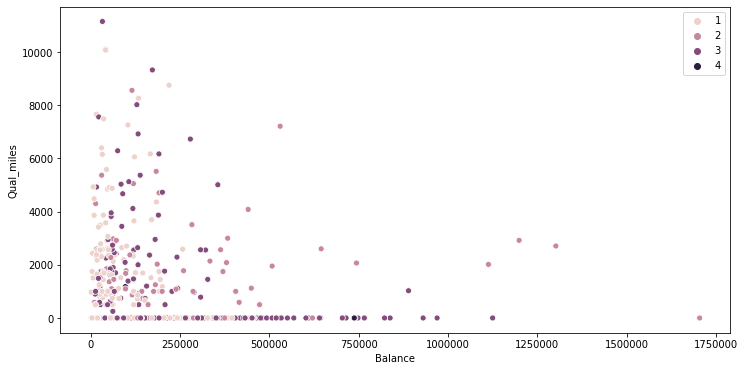

In [21]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=air['Balance'],y = air['Qual_miles'],hue = y_kmeans1)

## Hierarchical Clustering

In [23]:
air1_std = air_std

In [30]:
from scipy.cluster.hierarchy import dendrogram,linkage 
import scipy.cluster.hierarchy as sch

In [31]:
np.set_printoptions(precision=5,suppress=True)

In [32]:
H_cluster = linkage(air1_std,'ward')

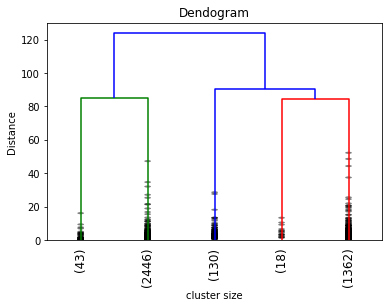

In [35]:
plt.title('Dendogram')
plt.xlabel('cluster size')
plt.ylabel('Distance')

dendrogram(
    H_cluster,
    truncate_mode='lastp',
    p=5,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()

In [37]:
from scipy.cluster.hierarchy import fcluster

In [38]:
k = 5

In [39]:
cluster_2 = fcluster(H_cluster,k,criterion='maxclust')
cluster_2[0:30:,]

array([2, 2, 2, 2, 5, 2, 5, 2, 1, 5, 2, 5, 2, 2, 2, 5, 5, 2, 5, 5, 5, 5,
       2, 2, 2, 2, 2, 2, 5, 2], dtype=int32)

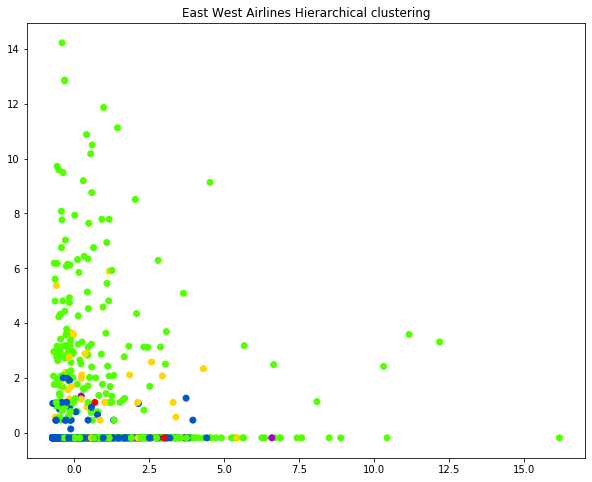

In [40]:
plt.figure(figsize=(10,8))
plt.scatter(air1_std.iloc[:,0],air1_std.iloc[:,1],c=cluster_2,cmap='prism')
plt.title('East West Airlines Hierarchical clustering')
plt.show()

In [41]:
cluster_Hierarchical = pd.DataFrame(cluster_2)

In [42]:
air1 = air

In [43]:
air1['cluster'] = cluster_Hierarchical

In [44]:
air1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,5
